In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder

In [261]:
data = pd.read_csv('/Users/mac/Downloads/bank.csv')

In [262]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [264]:
data[data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


In [265]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

## Visualisation:

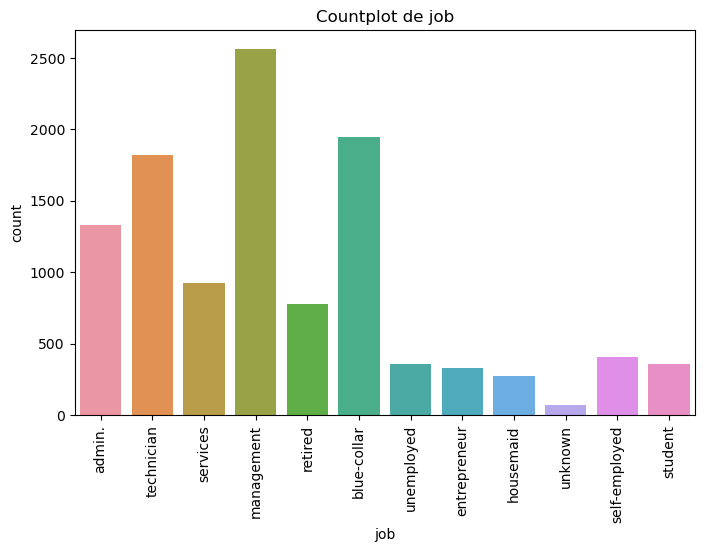

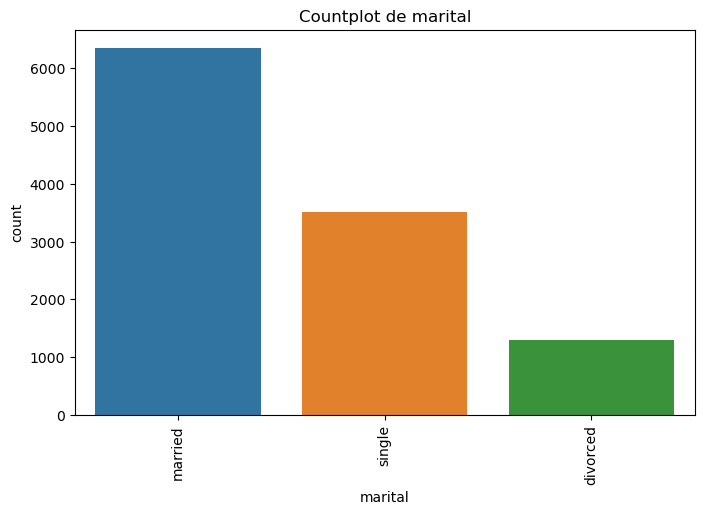

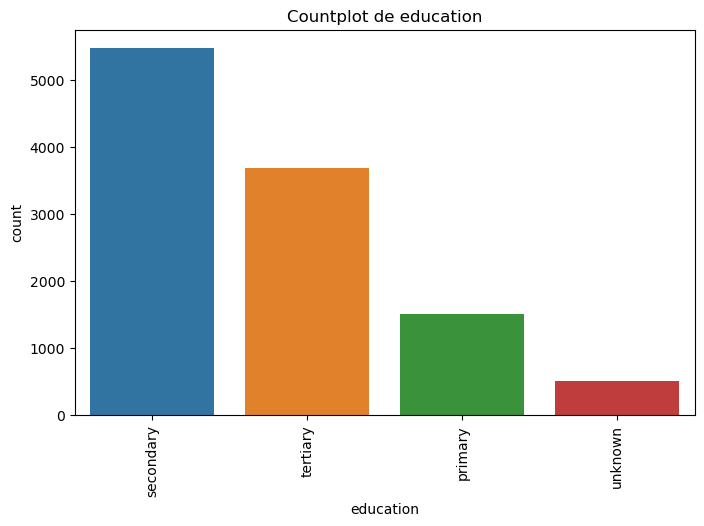

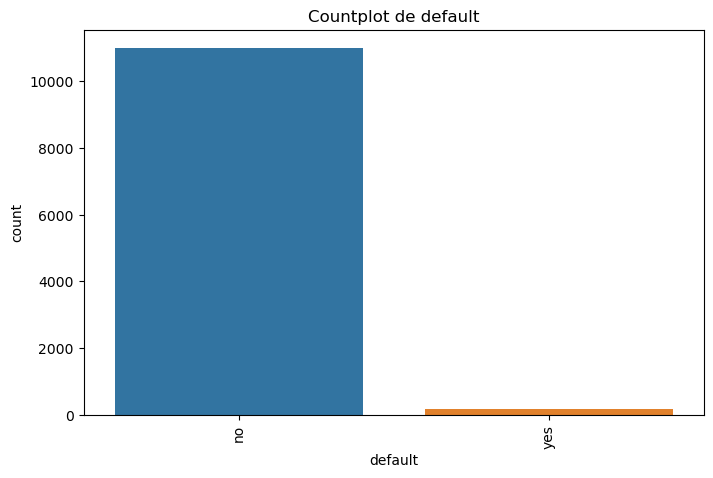

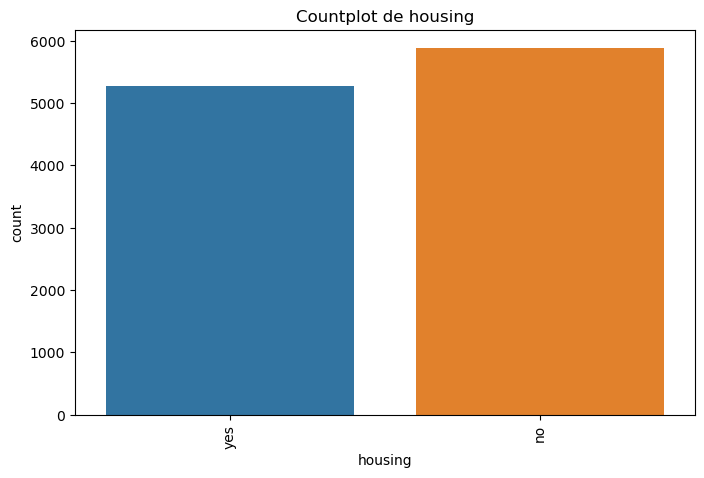

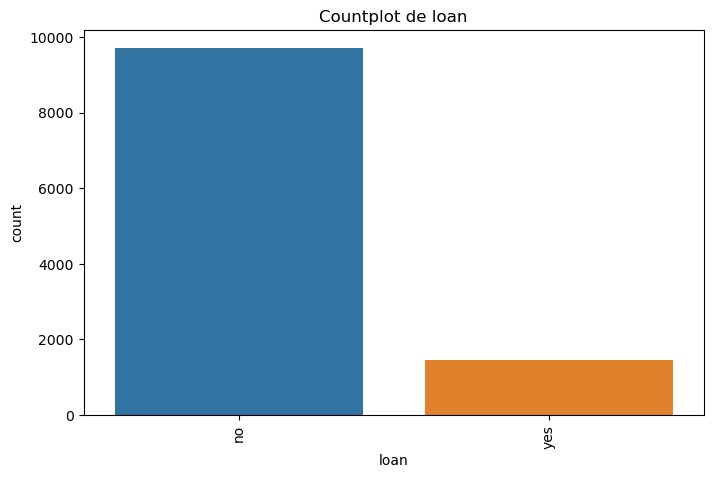

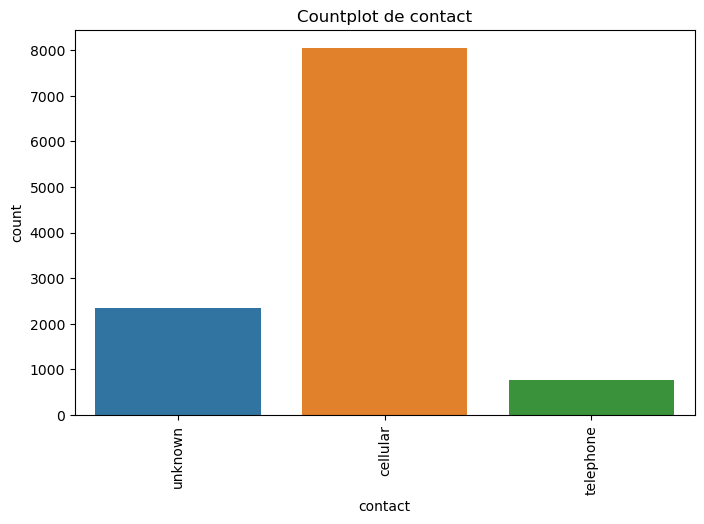

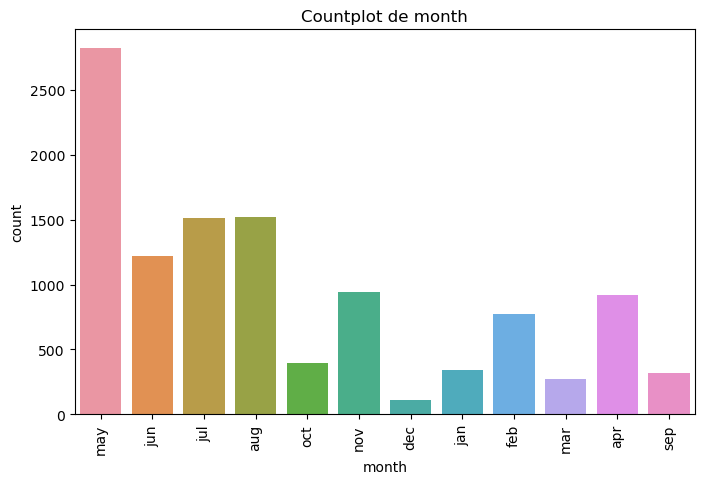

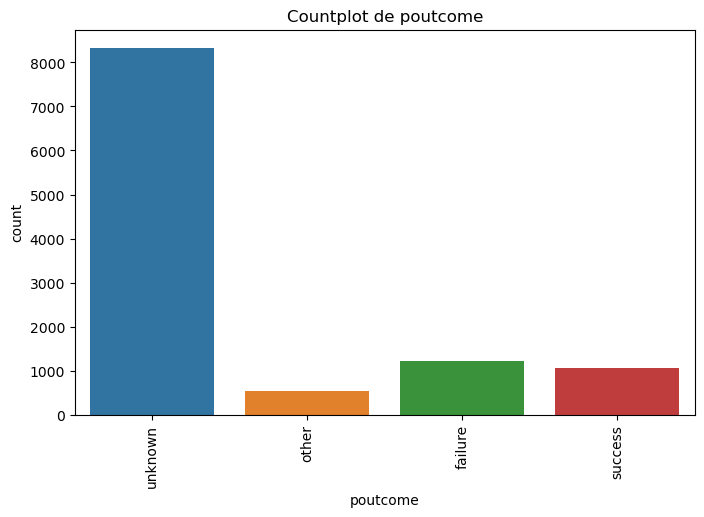

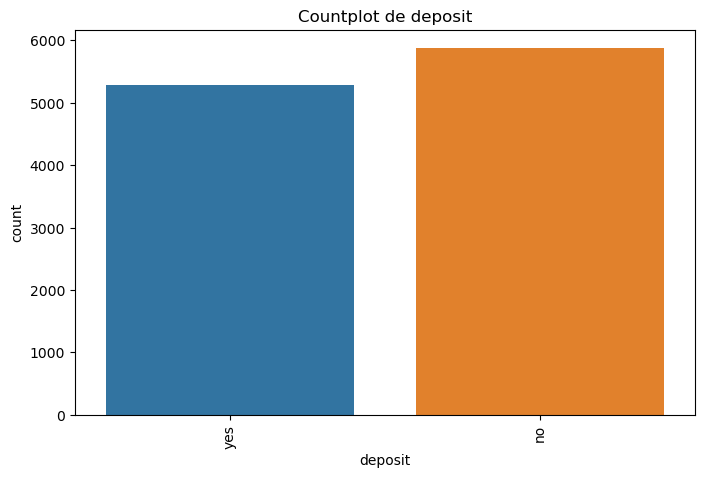

In [266]:
# Filtrer les colonnes qualitatives
variables_qualitatives = data.select_dtypes(include='object').columns

# Parcours des variables qualitatives et création des countplots
for variable in variables_qualitatives:
    plt.figure(figsize=(8, 5))  # Taille de la fenêtre pour chaque countplot
    ax = sns.countplot(x=variable, data=data)
    plt.title(f'Countplot de {variable}')
    # Affichage des graduations de l'axe des x en vertical
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()

## Netoyage et encodage des donnees:

In [267]:
# Remplacer les unknown par le mode
variables_qualitatives = data.select_dtypes(include='object').columns

# Parcours des variables qualitatives et remplacement des 'unknown' par le mode
for variable in variables_qualitatives:
    mode_value = data[variable].mode()[0]
    data[variable] = data[variable].replace('unknown', mode_value)

In [268]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,cellular,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,cellular,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,cellular,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,cellular,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,cellular,5,may,673,2,-1,0,unknown,yes


In [269]:
df = data.drop(['contact', 'default','loan','poutcome'], axis=1)

## Encodage des variables

In [270]:
# Encodage ordinal pour la colonne 'education'
label_encoder = LabelEncoder()
df['education'] = label_encoder.fit_transform(df['education'])

# Encodage one-hot pour les autres colonnes
df = pd.get_dummies(df, columns=['marital', 'job', 'housing', 'month'], drop_first=True)
# Encoder 'deposit' avec 1 pour 'Yes' et 0 pour 'No'
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

In [271]:
df.dtypes

age                  int64
education            int64
balance              int64
day                  int64
duration             int64
campaign             int64
pdays                int64
previous             int64
deposit              int64
marital_married      uint8
marital_single       uint8
job_blue-collar      uint8
job_entrepreneur     uint8
job_housemaid        uint8
job_management       uint8
job_retired          uint8
job_self-employed    uint8
job_services         uint8
job_student          uint8
job_technician       uint8
job_unemployed       uint8
housing_yes          uint8
month_aug            uint8
month_dec            uint8
month_feb            uint8
month_jan            uint8
month_jul            uint8
month_jun            uint8
month_mar            uint8
month_may            uint8
month_nov            uint8
month_oct            uint8
month_sep            uint8
dtype: object

## Division en features (X) et target (y)

In [272]:
X = df.drop('deposit', axis=1)
y = df['deposit']

## Entraînement et de test

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardisation des données

In [274]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Construction du modèle

In [275]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [276]:
#Entraînement du modèle
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
224/224 [==============================] - 2s 3ms/step - loss: 0.5307 - accuracy: 0.7323 - val_loss: 0.4402 - val_accuracy: 0.8096
Epoch 2/10
224/224 [==============================] - 1s 2ms/step - loss: 0.4205 - accuracy: 0.8190 - val_loss: 0.4091 - val_accuracy: 0.8163
Epoch 3/10
224/224 [==============================] - 1s 3ms/step - loss: 0.3948 - accuracy: 0.8270 - val_loss: 0.3890 - val_accuracy: 0.8337
Epoch 4/10
224/224 [==============================] - 1s 3ms/step - loss: 0.3753 - accuracy: 0.8361 - val_loss: 0.3867 - val_accuracy: 0.8303
Epoch 5/10
224/224 [==============================] - 1s 2ms/step - loss: 0.3658 - accuracy: 0.8426 - val_loss: 0.3849 - val_accuracy: 0.8376
Epoch 6/10
224/224 [==============================] - 1s 3ms/step - loss: 0.3570 - accuracy: 0.8477 - val_loss: 0.3834 - val_accuracy: 0.8393
Epoch 7/10
224/224 [==============================] - 1s 3ms/step - loss: 0.3505 - accuracy: 0.8484 - val_loss: 0.3787 - val_accuracy: 0.8365
Epoch 

In [277]:
# Évaluation du modèle
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

70/70 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8245
Test Loss: 0.4095
Test Accuracy: 0.8245


In [278]:
# Prédictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) 

70/70 [==============================] - 0s 1ms/step


In [279]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", conf_matrix)

Matrice de confusion :
 [[892 274]
 [118 949]]


In [281]:
# Rapport de classification
class_report = classification_report(y_test, y_pred)
print("Rapport de classification :\n", class_report)

Rapport de classification :
               precision    recall  f1-score   support

           0       0.88      0.77      0.82      1166
           1       0.78      0.89      0.83      1067

    accuracy                           0.82      2233
   macro avg       0.83      0.83      0.82      2233
weighted avg       0.83      0.82      0.82      2233

